### Straightforward Step-by-Step Guide
## In this Notebook you will get to know important concepts regarding Tabluar Data Prediction with Regression as focus.

 ## Introduction
>    - The dataset contains various features of a House (Garage Type, Over Qualilty, No of Bedrooms, No of bath rooms etc., ) and a Target Variable( Sale Price ).
>    - Because SalePrice is continuous value, it is a good fit for a Regression Model.


 ## Feature Selection/Engineering:
>   - Always remove target variable column before creating a model on traing data.
>   - The input features are very elaborate and thourough , so we need to find the features which are useful, otherwise with noisy data, our model performance reduces.
>   - Added derived features on date datatype. 
>   - Features were selected based on understanding of nominal, ordinal and numeric data types.
>   - Performed Correlation Matrix for numeric Data and Mutual Information for Categorical Data to select best features.
>   - Normalized Numeric Data with BoxCox Transformation to fix the skewness.
>   - Created final train data and test data


 ## Model Selection:
>   - Tried Linear Regression, Gradient Boosting Regressor with GridSearch and ElasticNet with GridSearch
>   - Used pipeline for model creation
>   -  Model Comparision:
>      - Used RMSE, RMSLE to score the models.


 ## Hybrid Model:
>   - Individually Gradient Boost was giving best results. We tried stacking the models with a weightage and we got signigicant score reduction.


 ## References
>   -  [Simple linear regression models](http://www.kaggle.com/code/rbyron/simple-linear-regression-models) by ROCÍO VENTURA
>   - [House Prices Competition using sklearn linear Reg](http://www.kaggle.com/code/onepabs/house-prices-competition-using-sklearn-linear-reg) by JUAN PABLO CONTRERAS


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
print("Lets look at the files provided by Kaggle as Input: ")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print("  ",os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


Lets look at the files provided by Kaggle as Input: 
   /kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
   /kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
   /kaggle/input/house-prices-advanced-regression-techniques/train.csv
   /kaggle/input/house-prices-advanced-regression-techniques/test.csv


>  In machine learining, to solve a regression problem or to predict a continuous output there are many ML methods we can use. We try to select the ones that gives us the best predicted values (low RMSE/RMSLE) and which works effciently with the given data (R-square). In this notebook we are going to find ways on how to reduce the cost funtion( measure of how well a machine learning model performs by quantifying the difference between predicted and actual outputs) so that we can get best results.

**SETUP FOR THE NOTEBOOK**

In [2]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split #This function is commonly used to split data into training and testing sets for machine learning tasks.
from sklearn.preprocessing import StandardScaler, RobustScaler #helps in standardizing features by removing the mean and scaling to unit variance.
from sklearn import linear_model #provides various regression models
import matplotlib.pyplot as plt #for plotting and visualizing graphs plt is used

> Lets create pandas dataframe for training and testing seperately.


In [3]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

> Here pd.read_csv reads the data in the given loaction and then we assign them to variables train_data and test_data .
> We use train_data to train tour model so that it can learn patterns from train_data and use that knowledge to predict values for test_data

In [4]:
# Check the Data Sizes
print("Printing Training Data Size and Test Data Size: ")
num_rows_train = len(train_data.index)
print("num rows in training data: " + str(num_rows_train))
print("num rows in test data: " + str(len(test_data.index)))

# store and drop the training predictions
y_train = train_data.iloc[:,-1]
train_data.drop(columns=train_data.columns[-1], 
        axis=1, 
        inplace=True)

Printing Training Data Size and Test Data Size: 
num rows in training data: 1460
num rows in test data: 1459


> After storing train_data and test_data we remove the target varible from train_data and store it in y_train because we can't let the model know about the target variables. 

In [5]:
# Create a Global Dataset
all_data = pd.concat([train_data, test_data],axis=0).reset_index(drop=True)
print("num rows in all data: " + str(len(all_data.index)))

# delete id column because ID is not a predictor of house price
ids = all_data.drop('Id', axis=1)

num rows in all data: 2919


> We are doing something very interesting in the above cell.
We combined train and test data.

> ## But Why ?
    
>  Since, we will do Feature Engineering ( Dummy Coding of Categorical variables for example), we need to know all possible categories for each column. 
Otherwise, some categories in test data could be missing in train data and the model does not perform well on test data.
    


In [6]:
# Add a Derived Column
all_data.at[2549,"YearBuilt"] = 2007
all_data["age_before_sale"] = all_data['YrSold'] - all_data['YearBuilt']
all_data[all_data["age_before_sale"]<0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age_before_sale


> Age of the building can be good derived column which should have an impact on Sale Price in practical sense. So add the new column and check if we get any zeroes. Interestingly row number 2549 had a missing value, so we replaced with the 2007 (because, that is the YrSold for this property).

In [7]:
# Ordinal Data to Numeric Data
conversion_dict = {'Ex': 9, 'Gd': 7,'TA': 5,'Fa': 3,'Po': 1,'NA': 0}
all_data['BsmtQual_Num'] = all_data['BsmtQual'].fillna(all_data['BsmtQual'].mode()[0]).map(conversion_dict)
all_data['BsmtCond_num'] = all_data['BsmtCond'].fillna(all_data['BsmtCond'].mode()[0]).map(conversion_dict)
all_data['HeatingQC_num'] = all_data['HeatingQC'].fillna(all_data['HeatingQC'].mode()[0]).map(conversion_dict)
all_data['KitchenQual_num'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0]).map(conversion_dict)
all_data['FireplaceQu_num'] = all_data['FireplaceQu'].fillna(all_data['FireplaceQu'].mode()[0]).map(conversion_dict)
all_data['GarageQual_num'] = all_data['GarageQual'].fillna(all_data['GarageQual'].mode()[0]).map(conversion_dict)
all_data['GarageCond_num'] = all_data['GarageCond'].fillna(all_data['GarageCond'].mode()[0]).map(conversion_dict)
all_data['ExterQual_num'] = all_data['ExterQual'].fillna(all_data['ExterQual'].mode()[0]).map(conversion_dict)
all_data['ExterCond_num'] = all_data['ExterCond'].fillna(all_data['ExterCond'].mode()[0]).map(conversion_dict)
all_data['PoolQC_num'] = all_data['PoolQC'].fillna(all_data['PoolQC'].mode()[0]).map(conversion_dict)
all_data['Fence_num'] = all_data['Fence'].fillna(all_data['Fence'].mode()[0]).map(conversion_dict)


> There are some categorical features which can used for numerical analysis or modeling tasks, preserving their ordinal nature. That's why we transformed these into numerical features.

> We should be very careful in differentiating nominals, ordinals, numeric and ratio.
>  - Above, we see those columns to have ordinal data with shorthand form Excellent(Ex), Good(Gd), Typical (TA), Fair (FA), Poor (Po), None (NA)
>  - These are Strings by data types but not in actual terms. Because if we try to rank then, Excellant will be put above Good, Typical and others.  Inherently, they have an order so they are ordinal data. In this notebook, let's convert ordinal data to a form of numeric in 0-10 scale.

In [8]:
# Find Multi-collinear columns - (columns with same information)
numeric = all_data.select_dtypes(exclude=['object']).columns
numeric1 = numeric.drop([ 'MSSubClass', 'Id',  'MoSold', 'YrSold','YearRemodAdd', 'GarageYrBlt', 'YearBuilt'])
all_data_num = all_data.loc[:, numeric1].fillna(0)
correlation_matrix = all_data_num.corr(method = 'pearson')
correlation_matrix

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtCond_num,HeatingQC_num,KitchenQual_num,FireplaceQu_num,GarageQual_num,GarageCond_num,ExterQual_num,ExterCond_num,PoolQC_num,Fence_num
LotFrontage,1.000000,0.135246,0.132635,-0.036252,0.108969,0.069193,-0.004681,0.136565,0.205762,0.242302,...,0.001123,0.078355,0.124417,0.087979,0.006860,-0.002218,0.120738,-0.029266,-0.045458,NaN
LotArea,0.135246,1.000000,0.100541,-0.035617,0.124728,0.194168,0.084107,0.021590,0.254316,0.332460,...,0.036338,0.011574,0.080779,-0.040553,0.044205,0.014020,0.061780,0.003708,-0.043371,NaN
OverallQual,0.132635,0.100541,1.000000,-0.093847,0.426528,0.282150,-0.042605,0.275643,0.549763,0.479152,...,0.169346,0.474355,0.676215,0.007254,0.184189,0.161710,0.733355,0.006353,-0.019916,NaN
OverallCond,-0.036252,-0.035617,-0.093847,1.000000,-0.133118,-0.050823,0.041359,-0.138687,-0.174837,-0.157418,...,0.097007,-0.009676,-0.052439,-0.001789,-0.024154,0.050441,-0.151619,0.404190,0.002291,NaN
MasVnrArea,0.108969,0.124728,0.426528,-0.133118,1.000000,0.301537,-0.014580,0.088173,0.393715,0.392367,...,0.058015,0.173763,0.319364,-0.019539,0.098559,0.063485,0.364174,-0.008949,-0.017138,NaN
BsmtFinSF1,0.069193,0.194168,0.282150,-0.050823,0.301537,1.000000,-0.054938,-0.476771,0.536650,0.458206,...,0.077169,0.100945,0.251968,-0.095949,0.151220,0.107865,0.236172,0.031527,-0.061859,NaN
BsmtFinSF2,-0.004681,0.084107,-0.042605,0.041359,-0.014580,-0.054938,1.000000,-0.238043,0.089561,0.084389,...,0.072779,-0.058118,-0.045376,-0.084170,0.041666,0.031664,-0.056374,0.078977,-0.059287,NaN
BsmtUnfSF,0.136565,0.021590,0.275643,-0.138687,0.088173,-0.476771,-0.238043,1.000000,0.412810,0.296788,...,-0.021354,0.181898,0.189270,0.146694,-0.042487,-0.037255,0.251591,-0.102632,0.029129,NaN
TotalBsmtSF,0.205762,0.254316,0.549763,-0.174837,0.393715,0.536650,0.089561,0.412810,1.000000,0.801376,...,0.086336,0.263238,0.431453,0.014804,0.129826,0.086425,0.473025,-0.039425,-0.057601,NaN
1stFlrSF,0.242302,0.332460,0.479152,-0.157418,0.392367,0.458206,0.084389,0.296788,0.801376,1.000000,...,0.079586,0.182749,0.392930,-0.007309,0.143359,0.097762,0.401775,-0.032214,-0.060836,NaN


> Here, we took all the features that are numeric data and stored it in a dataframe. Then we dropped the columns [ 'MSSubClass', 'Id',  'MoSold',  YrSold', 'YearRemodAdd', 'GarageYrBlt', 'YearBuilt']. We dropped 'MSSubClass' because it contains categorical data stored in numbers. And the ID because there's no point in finding the correlation on ID with other features, and the rest 'MoSold',  YrSold', 'YearRemodAdd', 'GarageYrBlt', 'YearBuilt' because we don't need them now, but it has a high significance while working with time series. 
> Then we use pearson method for calculating the correlation_matrix. We used pearson method beacuse the Pearson correlation coefficient measures the linear correlation between two variables. It quantifies the strength and direction of the linear relationship between two sets of data. The coefficient ranges from -1 to 1, where -1 indicates a perfect negative linear correlation, 0 indicates no linear correlation, and 1 indicates a perfect positive linear correlation.
> Highly Correlated features are nothing but duplicate information, its always good idea to remove all but one among the highly correlated features.

> ## But Why ?
>  Because when we try to find a best line among the features, considering all the highly correlated features gives extra weights to while finding the line and model becomes more biased towards them.
> 
> 
> And below we plotted a headmap for the correlation matrix because data visualization makes our work easy.

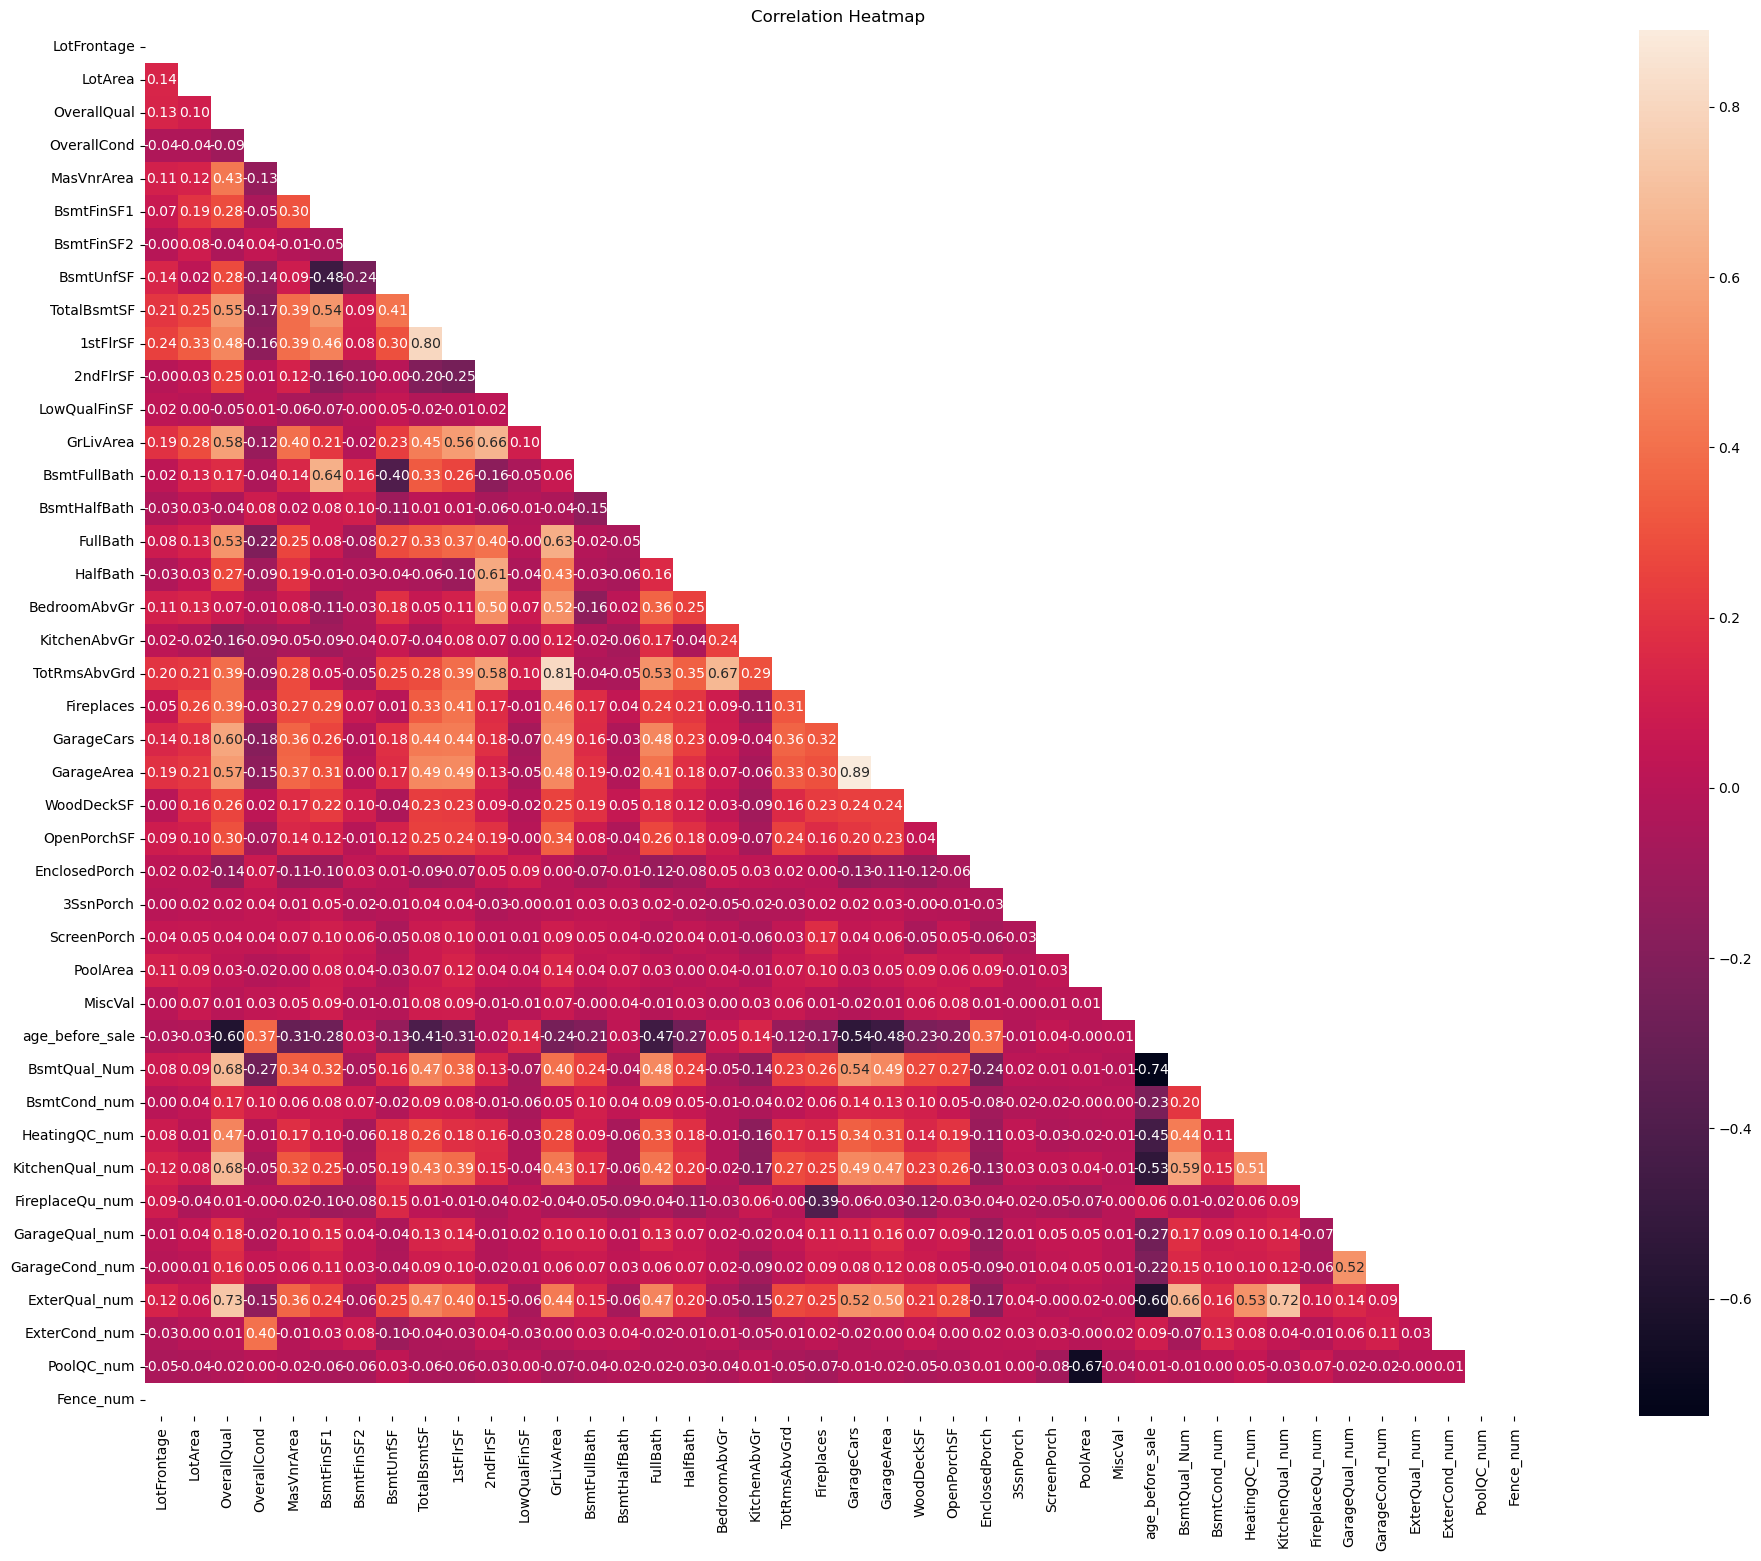

In [9]:
# Plot the correlation Matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(28, 18))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cbar=True, square=True, ax=ax)
ax.set_title('Correlation Heatmap')
plt.show()

>  mask: This parameter is used to hide or mask certain cells in the heatmap. It can be a boolean matrix with the same shape as the correlation matrix, where True values indicate the cells to be masked.
> 
>  annot=True: This parameter controls whether to annotate the heatmap with the correlation values. When set to True, the correlation values will be displayed in each cell of the heatmap.
>  
>  fmt=".2f": This specifies the format of the annotated values in the heatmap. In this case, ".2f" indicates that the values will be displayed as floating-point numbers with two decimal places.
>  
>  cbar=True: This parameter determines whether to display a color bar alongside the heatmap. The color bar provides a visual representation of the correlation values.

In [10]:

# Categorical Data
categories = all_data.select_dtypes(include=['object']).columns
# Since these columns were converted to numeric, we can remove from Categorical
categories = categories.drop(['BsmtQual','BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond', 'PoolQC', 'Fence' ])
categories=categories.append(all_data[['MSSubClass']].columns)
## Categorical Missing Features replacing with mode of the column
X = train_data.loc[:, categories].fillna(train_data.mode().iloc[0])
X

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,MiscFeature,SaleType,SaleCondition,MSSubClass
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Y,SBrkr,Typ,Attchd,RFn,Y,Shed,WD,Normal,60
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Y,SBrkr,Typ,Attchd,RFn,Y,Shed,WD,Normal,20
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Y,SBrkr,Typ,Attchd,RFn,Y,Shed,WD,Normal,60
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Y,SBrkr,Typ,Detchd,Unf,Y,Shed,WD,Abnorml,70
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Y,SBrkr,Typ,Attchd,RFn,Y,Shed,WD,Normal,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Y,SBrkr,Typ,Attchd,RFn,Y,Shed,WD,Normal,60
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Y,SBrkr,Min1,Attchd,Unf,Y,Shed,WD,Normal,20
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Y,SBrkr,Typ,Attchd,RFn,Y,Shed,WD,Normal,70
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Y,FuseA,Typ,Attchd,Unf,Y,Shed,WD,Normal,20


> The concept of correlation is primarily used to measure the linear relationship between continuous variables. Categorical variables, on the other hand, represent discrete or qualitative data and do not have a natural linear ordering. Therefore, calculating a correlation coefficient between categorical variables is not meaningful in the same way as with continuous variables. 
> 
> So what we do is we take the categorical values and store it in X dataframe. So that all the numerical features and categorical features in different dataframes.
> 
> For analyzing which categorical features contribute more to finding the predicted values we caluculate the mutual information score of those features.
> Mutual information is a measure of the mutual dependence or information shared between two random variables, regardless of whether they are categorical or continuous. It quantifies the amount of information obtained about one variable through the other variable. 
> 
>  Also we filled all the NaN variables with statistical mode.

In [11]:
y = y_train
for colname in X.select_dtypes("object"):
    X[colname],_ = X[colname].factorize()
discrete_features = X.convert_dtypes == int 



from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(X,y, discrete_features):
    mi_scores = mutual_info_classif(X,y, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores , name = "MI Scores" , index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores
mi_scores = make_mi_scores(X , y , discrete_features)


> Discrete features, also known as categorical features, are variables that take on a finite set of values or categories. These values are typically non-numeric and represent different groups, classes, or levels.
> 
> The factorize() function and identifies the discrete features in the transformed X dataset.
> The make_mi_scores() that uses the mutual_info_classif() function from scikit-learn's feature_selection module to calculate the mutual information scores between features (X) and the target variable (y). 
> 
> mi_scores = mi_scores.sort_values(ascending=False): This line sorts the mutual information scores in descending order, so that the features with higher mutual information are listed first.
> 
> Below is the bargraph for visualizing the mutual scores of the categorical features.
> 

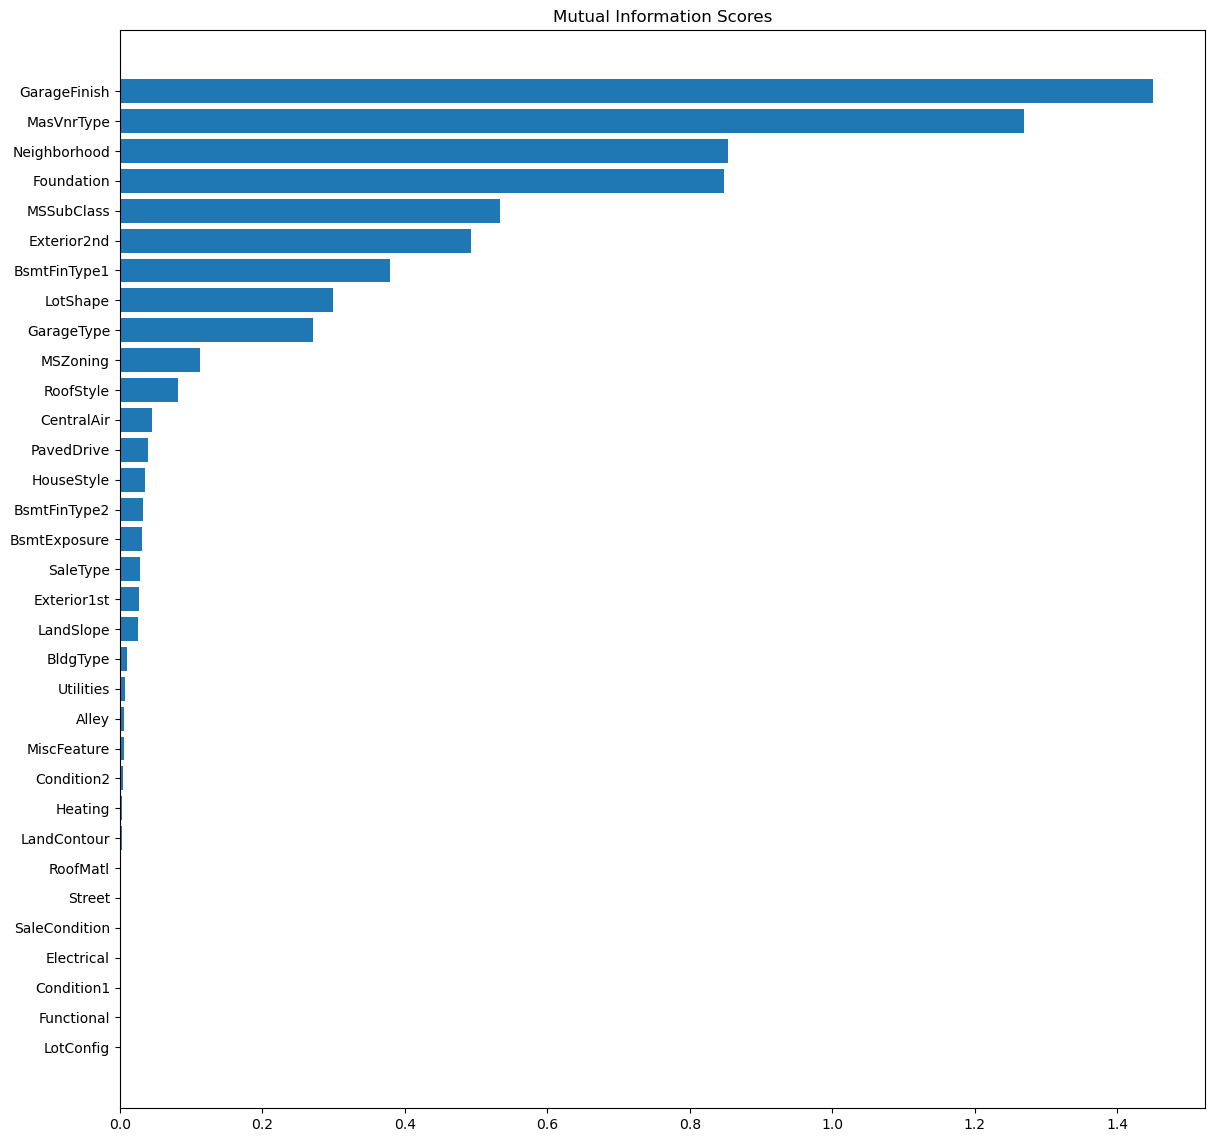

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(14, 14))
plot_mi_scores(mi_scores)


In [13]:
mi_scores

GarageFinish     1.450301
MasVnrType       1.269765
Neighborhood     0.854381
Foundation       0.847700
MSSubClass       0.533917
Exterior2nd      0.493218
BsmtFinType1     0.378683
LotShape         0.299116
GarageType       0.271941
MSZoning         0.112877
RoofStyle        0.081588
CentralAir       0.044620
PavedDrive       0.040355
HouseStyle       0.035690
BsmtFinType2     0.032028
BsmtExposure     0.030702
SaleType         0.028525
Exterior1st      0.026912
LandSlope        0.024956
BldgType         0.010057
Utilities        0.008013
Alley            0.005975
MiscFeature      0.005631
Condition2       0.004270
Heating          0.003048
LandContour      0.002903
Street           0.000000
SaleCondition    0.000000
Electrical       0.000000
Condition1       0.000000
Functional       0.000000
RoofMatl         0.000000
LotConfig        0.000000
Name: MI Scores, dtype: float64

> ### We can see 'GarageFinish','MasVnrType', 'Foundation', 'Neighborhood', 'MSSubClass' etc are having highest mi_score so for convinience we take the top 10 features that have highest mi_score for further processing

In [14]:

# Drop all the numeric features that have lot of missing values or have a correlation score greater than 0.6 or less than -0.6.
numeric1_after_corr = numeric1.drop(['GarageCars',  'BsmtFullBath', '1stFlrSF', '2ndFlrSF', 'GrLivArea','BedroomAbvGr','BsmtQual_Num', 'ExterQual_num', 'Fence_num', 'PoolQC_num',
                                    'GarageArea', 'KitchenQual_num', ])

# Select top 10 columns with highest mutual information score
all_data_cat = pd.get_dummies(data=all_data.loc[:, [  
'GarageFinish',
'MasVnrType'   , 
'Foundation',
'Neighborhood',
'MSSubClass' ,    
'Exterior2nd' ,
'BsmtFinType1'   ,
'LotShape',
'GarageType',
'MSZoning']])

all_data_num = all_data.loc[:, numeric1_after_corr].fillna(all_data.median(numeric_only =True))



In [15]:
all_data_num

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,...,ScreenPorch,PoolArea,MiscVal,age_before_sale,BsmtCond_num,HeatingQC_num,FireplaceQu_num,GarageQual_num,GarageCond_num,ExterCond_num
0,65.0,8450,7,5,196.0,706.0,0.0,150.0,856.0,0,...,0,0,0,5,5,9,7,5,5,5
1,80.0,9600,6,8,0.0,978.0,0.0,284.0,1262.0,0,...,0,0,0,31,5,9,5,5,5,5
2,68.0,11250,7,5,162.0,486.0,0.0,434.0,920.0,0,...,0,0,0,7,5,9,5,5,5,5
3,60.0,9550,7,5,0.0,216.0,0.0,540.0,756.0,0,...,0,0,0,91,7,7,7,5,5,5
4,84.0,14260,8,5,350.0,655.0,0.0,490.0,1145.0,0,...,0,0,0,8,5,9,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,4,7,0.0,0.0,0.0,546.0,546.0,0,...,0,0,0,36,5,7,7,5,5,5
2915,21.0,1894,4,5,0.0,252.0,0.0,294.0,546.0,0,...,0,0,0,36,5,5,7,5,5,5
2916,160.0,20000,5,7,0.0,1224.0,0.0,0.0,1224.0,0,...,0,0,0,46,5,9,5,5,5,5
2917,62.0,10441,5,5,0.0,337.0,0.0,575.0,912.0,0,...,0,0,700,14,5,5,7,5,5,5


> Numeric data are in very different scale like LotArea in order of 1000s and OverallCond below 10. So, while running regression its always best to make them in one scale. 
And also normalize the data to the extent possible so that regression loss function will be reduced. So, lets do boxcox transformation on every numeric column.

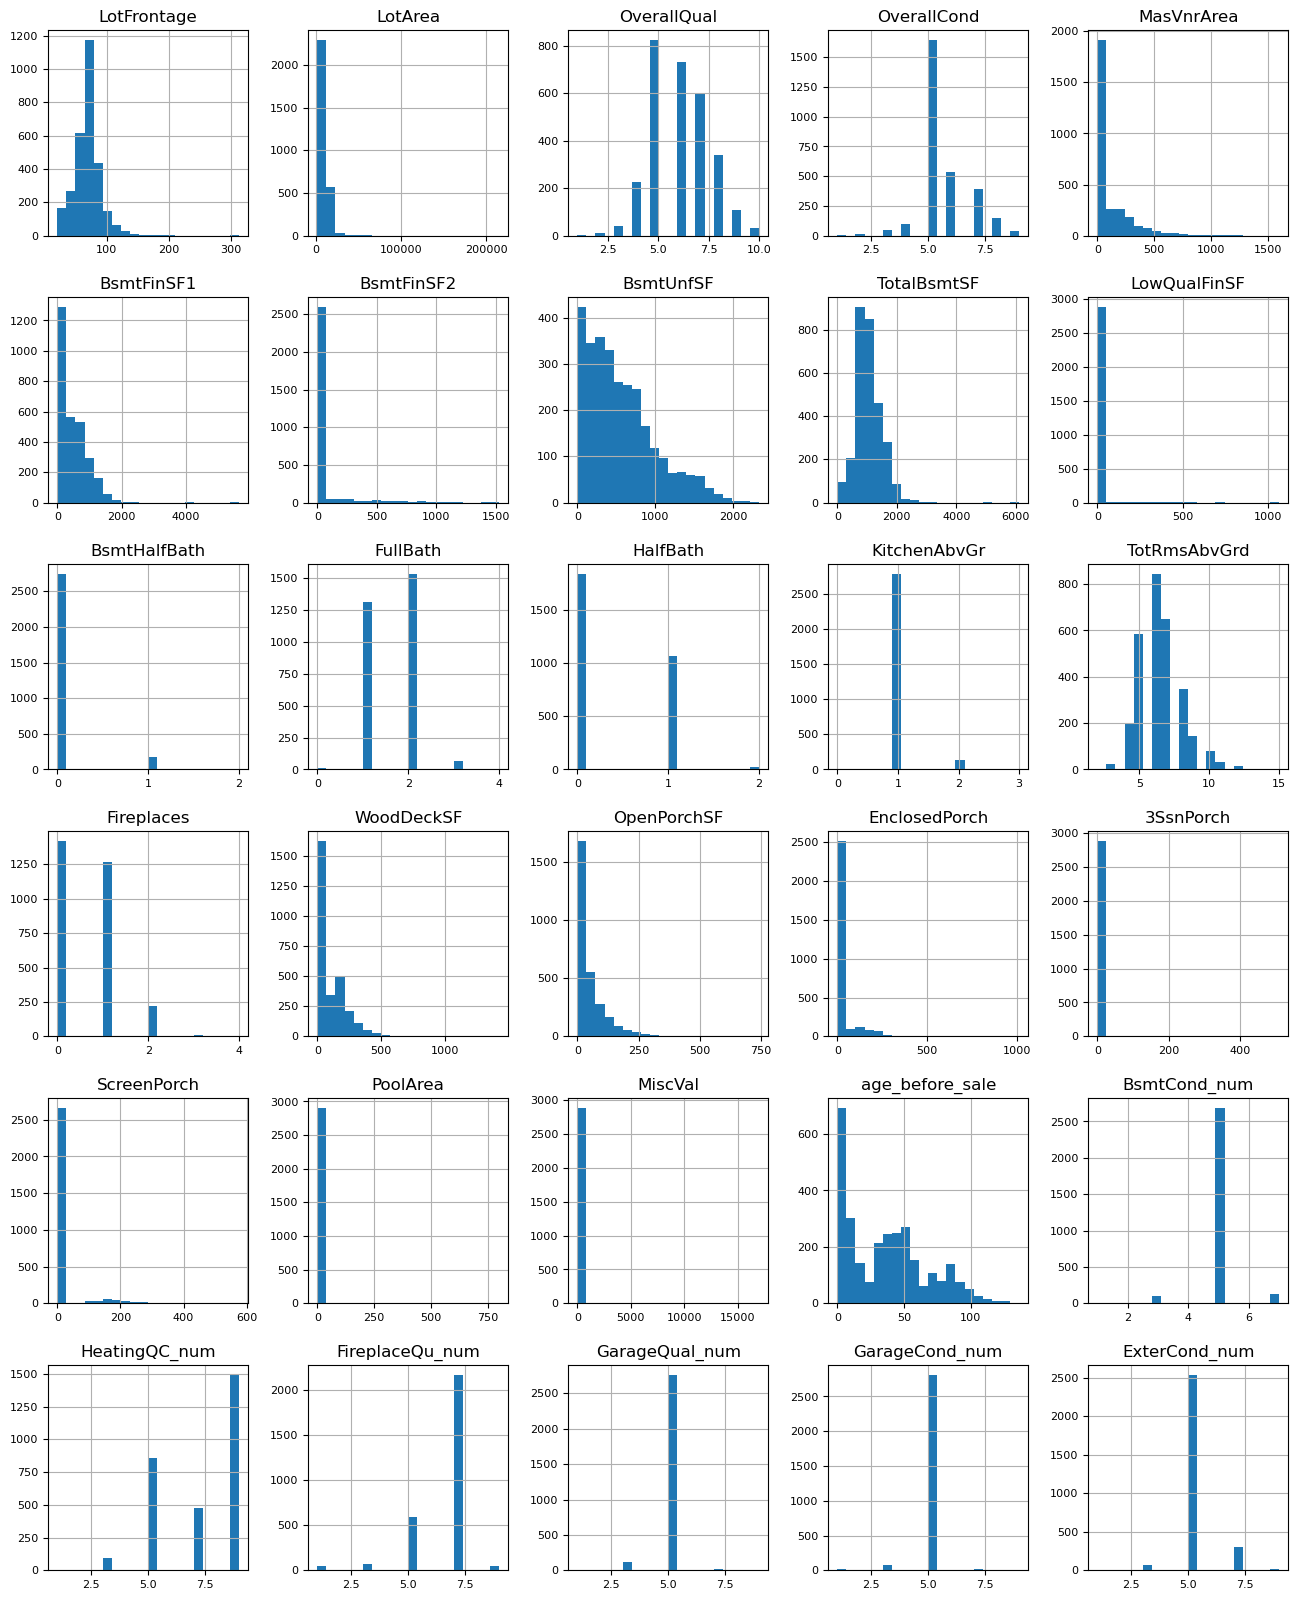

In [16]:
#all_data_num features before nomalization
all_data_num.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8);

In [17]:
from scipy import stats
normalized_num_data = all_data_num

# Apply Box-Cox transformation to each variable in all_data_num to normalize.
for var in normalized_num_data.columns:
    normalized_num_data[var], _ = stats.boxcox(normalized_num_data[var] + 1)


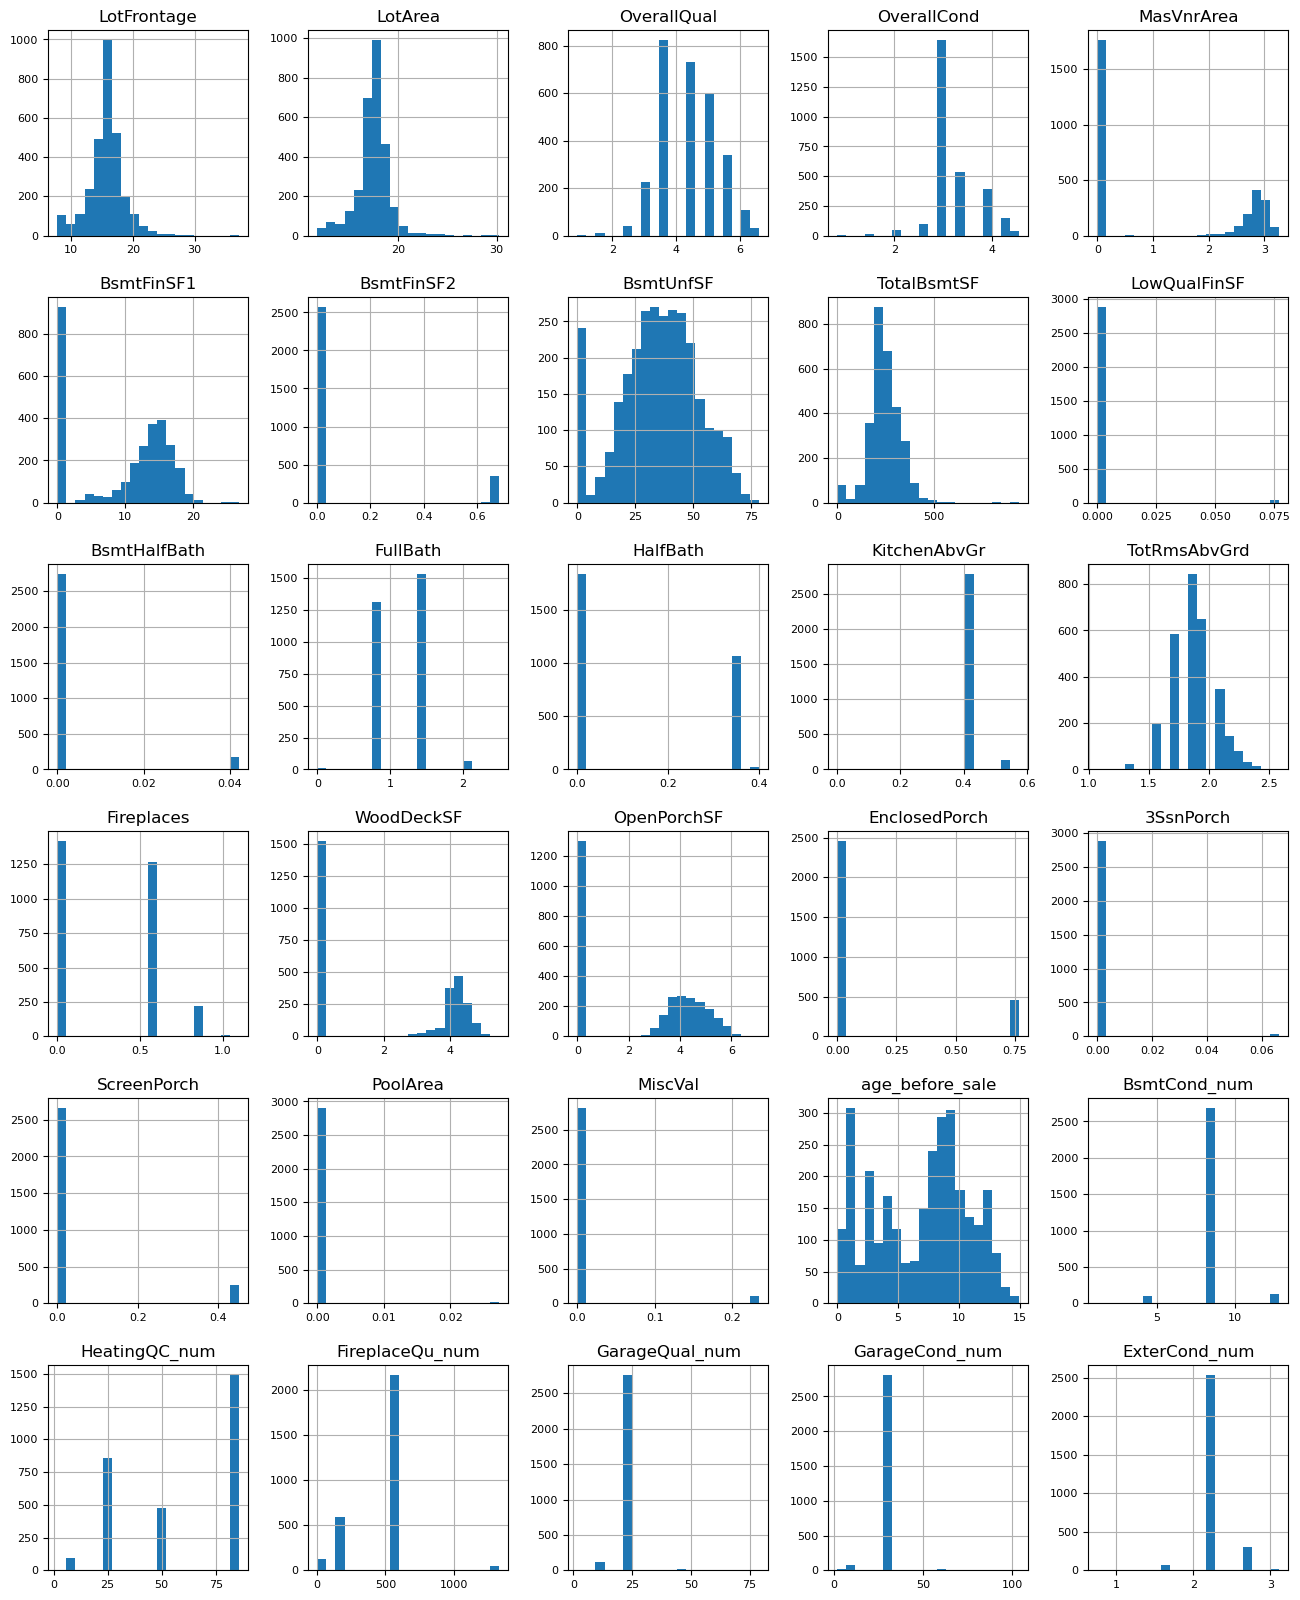

In [18]:
#all_data_num features after nomalization
normalized_num_data.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8);

> Combine Normalized Numeric Data and Categorical Data with axis=1, means attach one dataframe to other as new columns on same index.

In [19]:

all_data_final = pd.concat([normalized_num_data, all_data_cat], axis=1)

all_data_final.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,15.317430,17.222846,4.931149,3.009505,2.860781,15.064250,0.0,20.242450,213.364261,0.0,...,1,0,0,0,0,0,0,0,1,0
1,17.275519,17.639401,4.341268,4.193354,0.000000,16.551702,0.0,27.994208,286.176086,0.0,...,1,0,0,0,0,0,0,0,1,0
2,15.724709,18.166916,4.931149,3.009505,2.812112,13.489912,0.0,34.591544,225.329632,0.0,...,1,0,0,0,0,0,0,0,1,0
3,14.618599,17.622218,4.931149,3.009505,0.000000,10.499070,0.0,38.539985,194.213652,0.0,...,0,0,0,0,1,0,0,0,1,0
4,17.767869,18.976035,5.501962,3.009505,2.995086,14.737315,0.0,36.734286,265.881531,0.0,...,1,0,0,0,0,0,0,0,1,0


> Now, we end up with entire feature engineered data with name all_data_final. Lets split the train and test data by index.

In [20]:
#splitting back to test and train

columns = all_data_final.columns

X_train = all_data_final.iloc[0:num_rows_train,:]


print("num rows in X train: " + str(len(X_train.index)))
print("num rows in y train: " + str(len(y_train.index)))
X_test = all_data_final.iloc[num_rows_train:,:]
print("num rows in X test: " + str(len(X_test.index)))





num rows in X train: 1460
num rows in y train: 1460
num rows in X test: 1459


> columns = all_data_final.columns: This line retrieves the column names of the all_data_final DataFrame and assigns them to the columns variable.
> 
> X_train = all_data_final.iloc[0:num_rows_train, :]: This line selects the rows from the all_data_final DataFrame up to the num_rows_train index and assign it to the X_train variable. This is because we attached the training data to the first num_rows_train(1460) rows in the DataFrame.
> 
> X_test = all_data_final.iloc[num_rows_train:, :]: This line selects the rows from the all_data_final DataFrame starting from the num_rows_train index(1461 onwards) to the end of the DataFrame and assign it to the X_test variable.
> 

In [21]:
price = np.log1p(y_train)

> The np.log1p() transformation is commonly used when dealing with skewed or high-variance data, and it helps in making the data more suitable for modeling purposes.
Since features were normalized to smaller scale, its better to scale saleprice as well so that cost function optimization will be converged early.

In [22]:
# Split train, validation as 80%/20%
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, price, test_size=0.2, random_state=22)

> A validation set is a subset of the train data that is used to evaluate and tune the performance of a model during the model development and training process. It serves as an intermediary step between the training set and the final test set, helping to assess the model's generalization and optimize its hyperparameters.
> 
> By splitting the training data into these two subsets, you can use X_val and y_val to evaluate the model's performance during training, tune hyperparameters, and make decisions about model selection or adjustments. This helps in assessing the model's generalization and improving its performance before evaluating it on the final test set.

> In machine learning and statistical analysis, random processes or algorithms often involve some element of randomness, such as shuffling data, initializing weights in neural networks, or splitting data into train and test sets. The use of a random seed ensures that the random numbers or operations are generated in a consistent and reproducible manner. 
> Selecting random_state constant is also part of tuning the model. After various attempts, we saw 22 to give better results.

In [23]:
# Example Linear Regression



#from sklearn.pipeline import Pipeline

# pipeline = Pipeline([
#     ("Standard Scaling", StandardScaler()),
# #     ("model", linear_model.LinearRegression())
# ])


# pipeline.fit(X_train, y_train)

# print('Training Score', pipeline.score(X_train, y_train))

# print('Validation Score', pipeline.score(X_val, y_val))

> The Pipeline combines feature scaling with Standard Scaling and the Linear Regressor model. It applies the scaling to the features and then fits the Regressor to the scaled features. The pipeline allows you to streamline the preprocessing and modeling steps and perform them together.
> 
> The first step, "Standard Scaling", applies the StandardScaler() preprocessing step to scale the features. StandardScaler() standardizes the features by subtracting the mean and dividing by the standard deviation.
> 
> The second step, "model", is the final estimator, which is the Linear Regressor model.
> 
> These lines evaluate and print the training score and validation score of the pipeline. The score() method calculates the coefficient of determination (R-squared) between the predicted and actual target values. Higher scores indicate better model fit. Linear Regression is a good initial step, but there are other better algorithms, so we commented the code.

In [24]:
# Example Grid Search CV for Gradient Boosting Regressor

#  from sklearn.ensemble import GradientBoostingRegressor
# GBR = GradientBoostingRegressor()

# # parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
# #                   'subsample'    : [0.9, 0.5, 0.2, 0.1],
# #                   'n_estimators' : [100,500,1000, 1500],
# #                   'max_depth'    : [4,6,8,10]
# #                  }

# parameters = {'learning_rate': [0.02, 0.015, 0.05,0.1],
#                   'subsample'    : [0.5, 0.7],
#                   'n_estimators' : [ 100, 160,1000],
#                   'max_depth'    : [4,6]
#                  }
    
# grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
# grid_GBR.fit(X_train, y_train)
# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
# print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
# print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

> The above commented code, is Grid Search for Gradient Boost Regressor. With differnet parameter values we ran the above cell and got the best parameters.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
# Create a pipeline with GridSearchCV
GBR = GradientBoostingRegressor()

parameters_after_box_cox = {'learning_rate': [0.02, 0.015, 0.05,0.1],
                  'subsample'    : [0.5, 0.7],
                  'n_estimators' : [ 100, 160,1000],
                  'max_depth'    : [4,6]
                 }
pipeline = Pipeline([
#     ("Standard Scaling", StandardScaler()),
    ('grid_search', GridSearchCV(estimator= GBR, param_grid=parameters_after_box_cox, cv=2, n_jobs=-1))
])

# Fit the pipeline to your data


pipeline.fit(X_train_1, y_train_1)
print('Training Score', pipeline.score(X_train_1, y_train_1))

print('Validation Score', pipeline.score(X_val, y_val))

Training Score 0.9773100606397056
Validation Score 0.9038846825129526


>In the above step, we selected Gradient Boost Regression which is giving us very good results because of several factors, including the characteristics of the dataset and the specific requirements of the problem at hand, GradientBoostingRegressor happens to fit the data better than linear regression in this dataset. We could use other algorithms too according to our nature of dataset. 

>  We added a new cost GridSearch with array of learning rates, subsamples, estimators and max depths. GridSearchCV will run on every combination of the 4 parameters and selects the best combination among them for our future prediction.

> ### Find the best hyper parameters for Elastic Net Manually

In [26]:
# Elastic Net Pipeline
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV
# e_alphas = [0.0001, 0.005, 0.01, 0.05, 0.1]
e_alphas = [0.00001,0.0025,0.0005,0.0001]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]


for i in e_alphas:
    for j in e_l1ratio:
        elasticnet_pipeline = Pipeline([
             ("Robust Scaling", RobustScaler()),
            ('elasticNet',  ElasticNetCV( max_iter = 2000,alphas=[i], cv=2, l1_ratio=[j])) ])
        elasticnet_pipeline.fit(X_train_1, y_train_1)
       
        print('\nScore for i, j :', i, ' ', j)
        print('Training Score', elasticnet_pipeline.score(X_train_1, y_train_1))

        print('Validation Score', elasticnet_pipeline.score(X_val, y_val))




Score for i, j : 1e-05   0.8
Training Score 0.893136903244255
Validation Score 0.8938504426670774

Score for i, j : 1e-05   0.85
Training Score 0.893134561329818
Validation Score 0.8938557448405988

Score for i, j : 1e-05   0.9
Training Score 0.8931320852004981
Validation Score 0.8938609704754433

Score for i, j : 1e-05   0.95
Training Score 0.8931294779712331
Validation Score 0.8938651404189057

Score for i, j : 1e-05   0.99
Training Score 0.893127277986379
Validation Score 0.8938615210003252

Score for i, j : 1e-05   1
Training Score 0.8931267086656121
Validation Score 0.8938612266798356

Score for i, j : 0.0025   0.8
Training Score 0.8682761645774318
Validation Score 0.8842852283778534

Score for i, j : 0.0025   0.85
Training Score 0.8666563790436722
Validation Score 0.8830665848051642

Score for i, j : 0.0025   0.9
Training Score 0.865186691113514
Validation Score 0.8818762968744193

Score for i, j : 0.0025   0.95
Training Score 0.8638387741828406
Validation Score 0.88066047989097

> Along with Gradient Boost Regression we are using ElasticNet beacuse it is particularly useful when dealing with situations where there are many features, some of which may be correlated, and when there is a need for both feature selection and regularization to prevent overfitting. 

> In the above cell we created an ElasticNet pipeline that tests various combinations of alpha and L1_ratio hyperparameters, and prints the corresponding training and validation scores.

In [28]:
# Elastic Net Pipeline
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV
e_alphas = [0.00001,0.0025,0.0005,0.0001]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elasticnet_pipeline = Pipeline([
     ("Robust Scaling", RobustScaler()),
     ('elasticNet',  ElasticNetCV( max_iter = 2000,alphas=e_alphas, cv=2, l1_ratio=e_l1ratio))
])

elasticnet_pipeline.fit(X_train_1, y_train_1)

print('Training Score', elasticnet_pipeline.score(X_train_1,y_train_1))

print('Validation Score', elasticnet_pipeline.score(X_val,y_val))


Training Score 0.8882690787512436
Validation Score 0.8964314116266053


> After finding the best hyperparameters we are using it and fitting the model accordingly. 

In [29]:
# R-square on Gradient Boosting Regression
r2_train = pipeline.score(X_train_1,y_train_1)
print("R^2 on GBR training data: " + str(r2_train))

# R-square on ElasticNet
r2_train_en = elasticnet_pipeline.score(X_train_1,y_train_1)
print("R^2 on ElasticNet training data: " + str(r2_train_en))

R^2 on GBR training data: 0.9773100606397056
R^2 on ElasticNet training data: 0.8882690787512436


> Regression, to check Error with training, validation we can use RMSE or RMSLE.
For huge number, genearlly RMSLE is used. In our case Sale Price is big.

In [30]:

pred_val = pipeline.predict(X_val)
MSE = np.square(np.subtract(np.expm1(y_val),np.expm1(pred_val))).mean()   
   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error for GBR: ")  
print(rsme,"\n")

pred_val_en = elasticnet_pipeline.predict(X_val)
MSE_en = np.square(np.subtract(np.expm1(y_val),np.expm1(pred_val_en))).mean()   
   
rsme = math.sqrt(MSE_en)  
print("Root Mean Square Error for EN: ")  
print(rsme,"\n")

from sklearn.metrics import mean_squared_log_error

print("Root Mean Square Log Error for GBR: ")  
print(math.sqrt(mean_squared_log_error(np.expm1(y_val),np.expm1(pred_val))),"\n")

print("Root Mean Square Log Error for EN: ")  
print(math.sqrt(mean_squared_log_error(np.expm1(y_val),np.expm1(pred_val_en))),"\n")


Root Mean Square Error for GBR: 
23857.121058729415 

Root Mean Square Error for EN: 
26244.052827363597 

Root Mean Square Log Error for GBR: 
0.12206835076489649 

Root Mean Square Log Error for EN: 
0.12671289198884397 



> The Root Mean Square Error (RMSE) between the predicted values (pred_val) and the actual values (y_val) for the validation set. We used pipeline to predict output for X_val.
> 
> MSE = np.square(np.subtract(y_val,pred_val)).mean() calculates Mean Squared Error (MSE) between the actual values (y_val) and the predicted values (pred_val). It computes the squared difference between each corresponding pair of actual and predicted values, takes the mean of these squared differences, and assigns the result to MSE.
> 
> rsme = math.sqrt(MSE) calculates Root Mean Square Error (RMSE) by taking the square root of the MSE.The RMSE provides a measure of the average magnitude of the prediction errors, which is easier to interpret than the MSE. 
>
>In similar manner, Root Mean Square Log Error is calculated. 

## Why do we convert y_val and pred_val to exponential form ?
> Since target feature sales price was a high magnitude number, we converted it to log(sales price) and let the model build.
> But after our prediction, we are getting a lower number as output, to get the actual sales price we do inverse our log operation. Exponential is the inverse of our logarithm.
> So, we convert log(sales price) to exponential(log(sales prices)) which is nothing but sales price. (Because log and exponential cancel each other).

In [ ]:
# Are any of the numbers negative ? If yes , then we need to check its input parameters and take corrective steps.
neg_nos = [num for num in pred_val_en if num < 0]
print(neg_nos)

> ## Additional Information:
> Negative values in predictions can occur due to model limitations, outliers, data issues, incorrect feature scaling, overfitting, or inappropriate model choice. To fix this we need to take certain measures such as check for errors or outliers in the data, review the model's assumptions, apply proper feature scaling, consider different models or parameter adjustments, and evaluate the model's performance through cross-validation.

> Now, Because we have 2 Machine Learning methods that gave us good results.
> We can come up with a way to get the best of both worlds. So, here is a small code which takes in combination of weghts we want to assign to both models.
Since we got better Validation Score on Gradient Boost, we can give higher weights to GBR starting from 0.70 and pick the best one.

In [31]:
# Pick the weights that can give us best score.

pred_test = ( 0.6* np.expm1(pipeline.predict((X_test))) +  0.4* np.expm1(elasticnet_pipeline.predict((X_test)) ))# 0.6/0.4 combination gave best score.
print("Five first predictions: ")
print(pred_test[:5])
print()


Five first predictions: 
[129616.40695747 164918.20592129 179539.41470966 206006.95430182
 198051.32191325]



> By predicting the target variable for the test set, you can make use of your predictions in your new businesses.

In [32]:
# Kaggle Submission Code
sample_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission['SalePrice'] = pred_test
sample_submission.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission.head()

,Id,SalePrice
0,1461,129616.406957
1,1462,164918.205921
2,1463,179539.414710
3,1464,206006.954302
4,1465,198051.321913


### Submitting the results to Kaggle.